In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### With solve (OLD)

In [2]:
from neurodiffeq import diff
from neurodiffeq.ode import solve
from neurodiffeq.conditions import IVP

In [3]:
pop_eq = lambda u, t: diff(u, t) - 0.1*u
initial_vals = IVP(t_0 = 0, u_0 = 1.0)


#solving my ODE

solution_fun, loss_stats = solve(
ode = pop_eq, condition = initial_vals, t_min = 0.0, t_max = 100.0)

C:\Users\arazs\.conda\envs\tensorenviron\lib\site-packages\neurodiffeq\ode.py:262: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  FutureWarning,


<IPython.core.display.Javascript object>


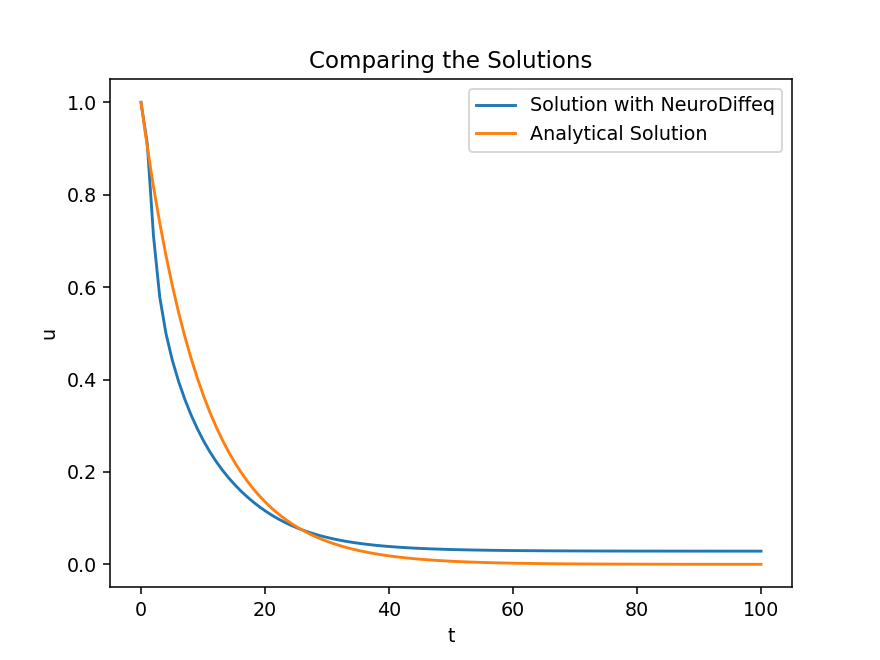

In [4]:
#Testing Solved function with analytical equivalent function

ts = np.linspace(0, 100.0, 100)
u_neuro = solution_fun(ts, to_numpy = True)
u_ana = np.exp(-0.1*ts)

plt.figure()
plt.plot(ts, u_neuro, label = 'Solution with NeuroDiffeq')
plt.plot(ts, u_ana, label = 'Analytical Solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Comparing the Solutions')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


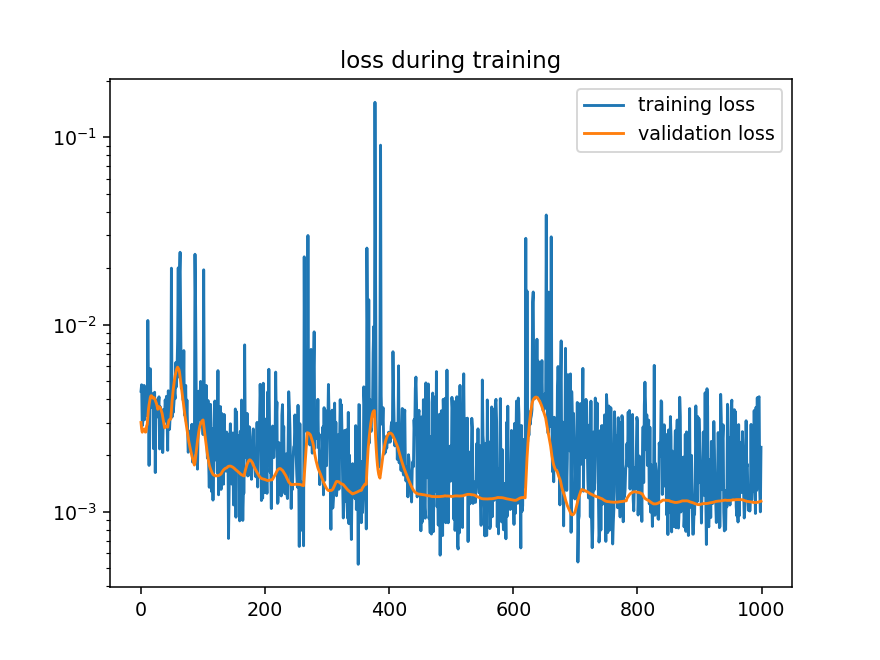

In [5]:
plt.figure()
plt.plot(loss_stats['train_loss'], label='training loss')
plt.plot(loss_stats['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

In [6]:
pop_eq = lambda u, t: diff(u, t) - 0.1*u
initial_vals = IVP(t_0 = 1.0, u_0 = 1.0)


#solving my ODE

solution_fun, loss_stats = solve(
ode = pop_eq, condition = initial_vals, t_min = 0.0, t_max = 100.0)

C:\Users\arazs\.conda\envs\tensorenviron\lib\site-packages\neurodiffeq\ode.py:262: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  FutureWarning,


<IPython.core.display.Javascript object>


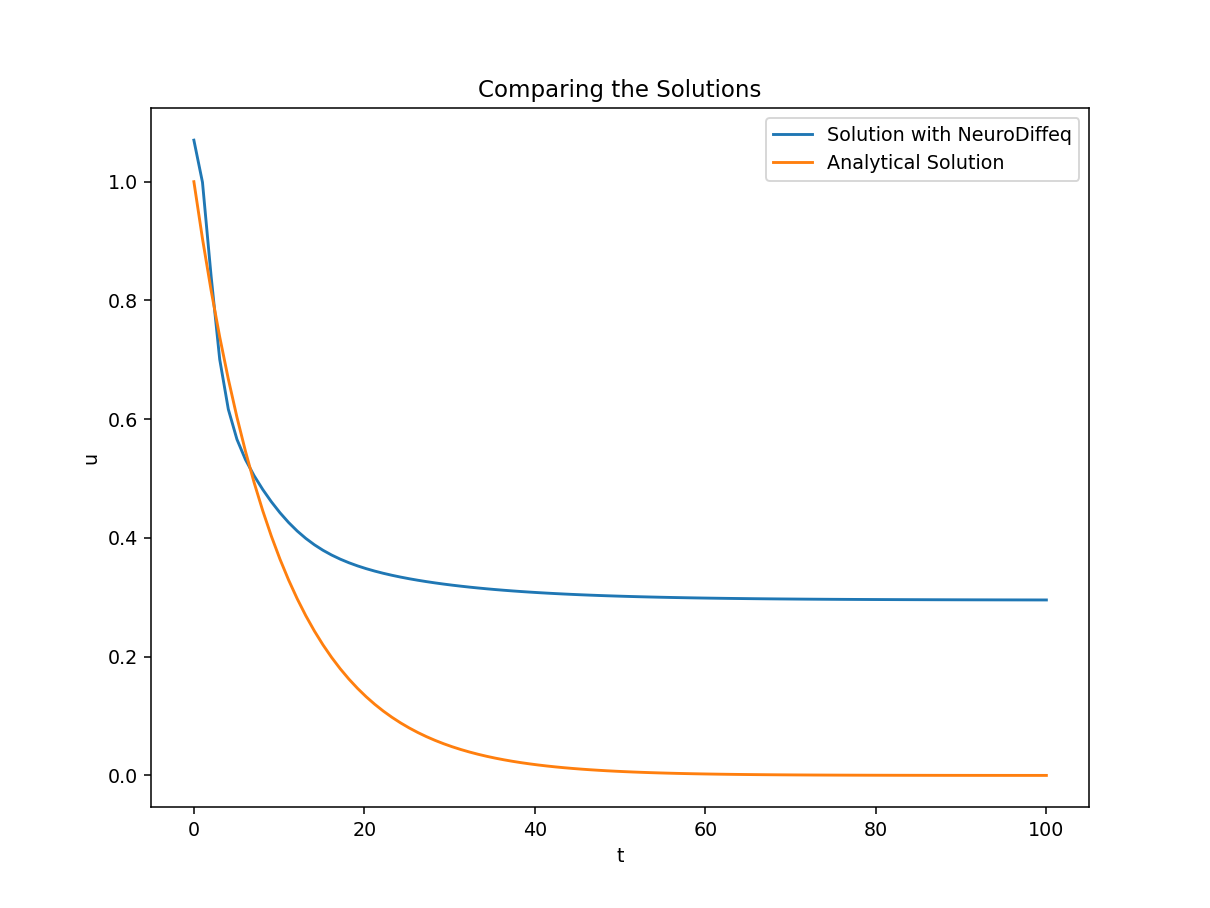

In [7]:
#Testing Solved function with analytical equivalent function

ts = np.linspace(0, 100.0, 100)
u_neuro = solution_fun(ts, to_numpy = True)
u_ana = np.exp(-0.1*ts)

plt.figure()
plt.plot(ts, u_neuro, label = 'Solution with NeuroDiffeq')
plt.plot(ts, u_ana, label = 'Analytical Solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Comparing the Solutions')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


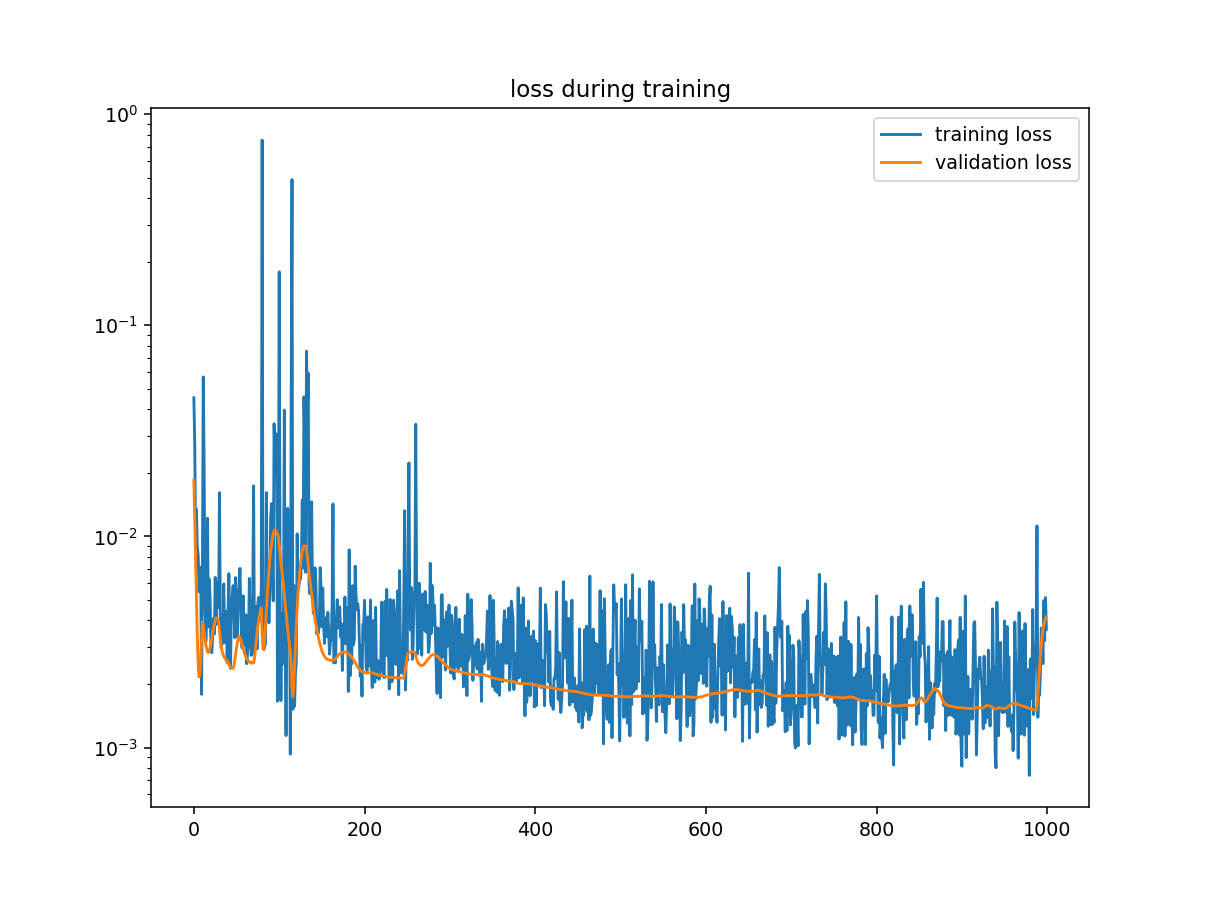

In [8]:
plt.figure()
plt.plot(loss_stats['train_loss'], label='training loss')
plt.plot(loss_stats['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

### With 1-D Solver (NEW)


In [9]:
from neurodiffeq.solvers import Solver1D
from neurodiffeq.callbacks import MonitorCallback

In [10]:
pop_eq = lambda u, t: [diff(u, t) - 0.1*u]
initial_vals = [IVP(t_0 = 0, u_0 = 1.0)]

solver = Solver1D(
ode_system = pop_eq, conditions = initial_vals, t_min = 0, t_max = 100.0)

In [11]:
solver.fit(max_epochs = 1000)

In [12]:
sol_1d = solver.get_solution()

<IPython.core.display.Javascript object>


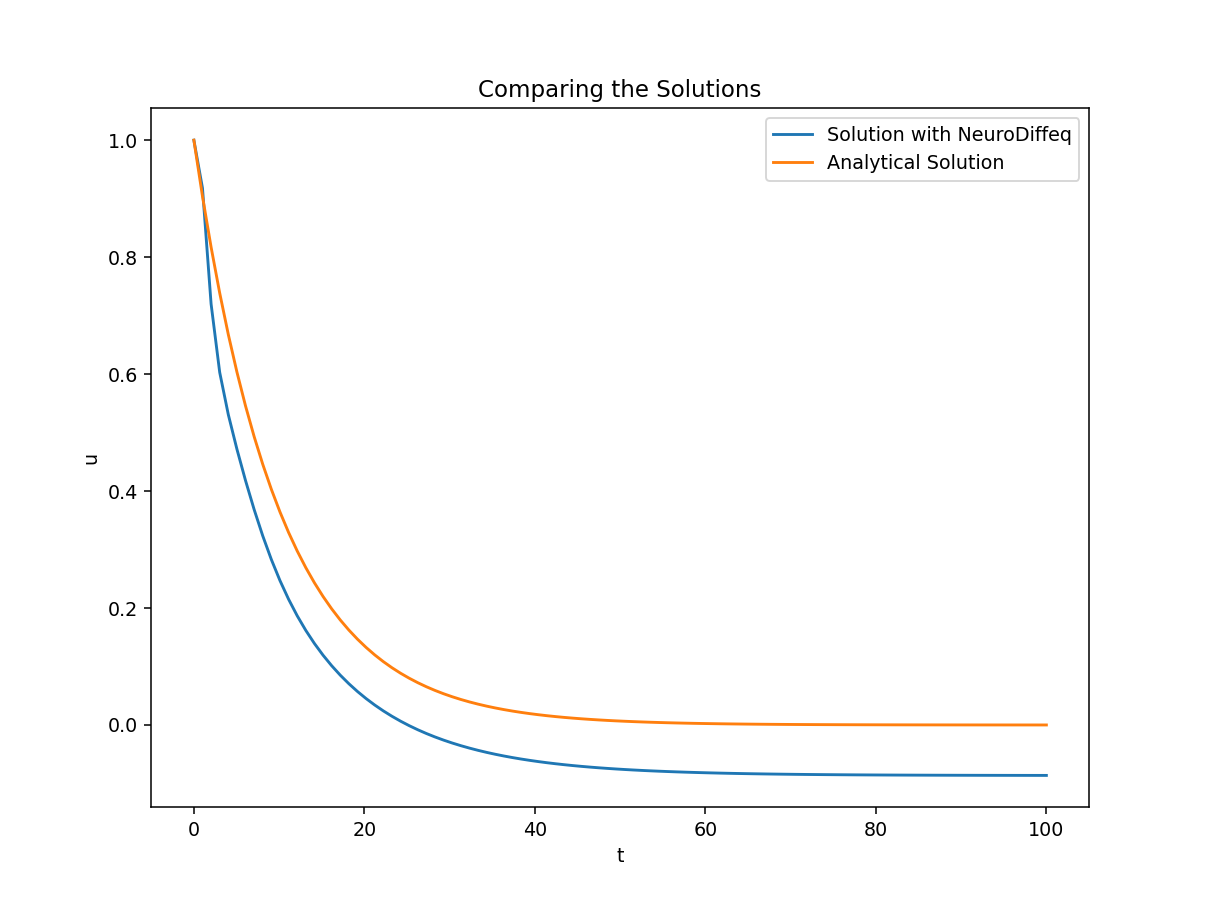

In [13]:
ts = np.linspace(0, 100.0, 100)
u_neuro = sol_1d(ts, to_numpy = True)
u_ana = np.exp(-0.1*ts)

plt.figure()
plt.plot(ts, u_neuro, label = 'Solution with NeuroDiffeq')
plt.plot(ts, u_ana, label = 'Analytical Solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Comparing the Solutions')
plt.legend()
plt.show()

In [14]:
np.log(np.exp(1))

1.0

In [15]:
sol_1d